# NASA Rover Images Post-Processing - DEBAYERING

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as pimg
from PIL import ImageEnhance as pime
from PIL import ImageFilter as pimf
import img_common as ic
import io_common as ioc
import os
import glob

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 96

### Example

In [3]:
# Path of the source image to debayer
img = 'cache/curiosity/3051MR0159330350605472C00_DXXX.png'

In [4]:
# Open the image into a numpy array
nda = ic.open_image_as_ndarray(img)

In [5]:
print('shape of the input image -> {0}'.format(nda.shape))

shape of the input image -> (1184, 1328)


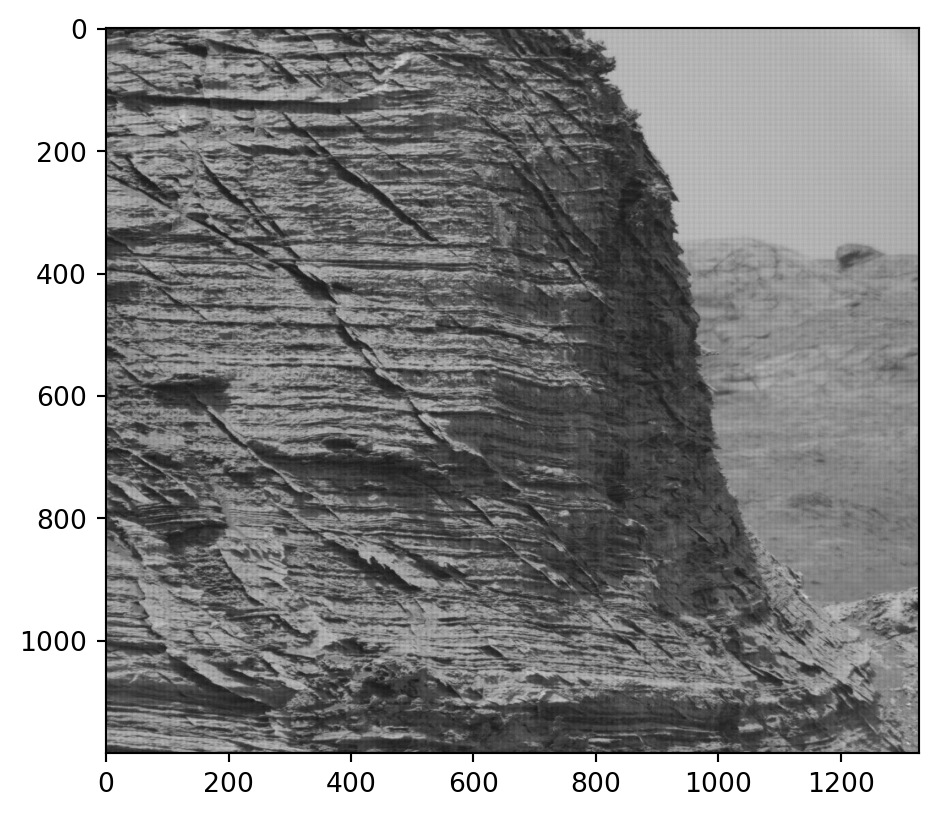

In [6]:
# Display the image
img_bw = ic.convert_ndarray_to_image(nda)

plt.imshow(img_bw, cmap='gray')
plt.show()

In [7]:
# In case the source image has got 3 dimensions, let's keep the
# first layer of the 3rd dimension only.
if nda.ndim == 3:
    nda=nda[:, :, 0]

In [8]:
# Debayer the image
# Supported modes -> ['gbrg', 'grbg', 'bggr', 'rggb']
nda_color = ic.debayer_ndarray(nda=nda, mode='rggb')

In [9]:
print('shape of the debayered image -> {0}'.format(nda_color.shape))

shape of the debayered image -> (592, 664, 3)


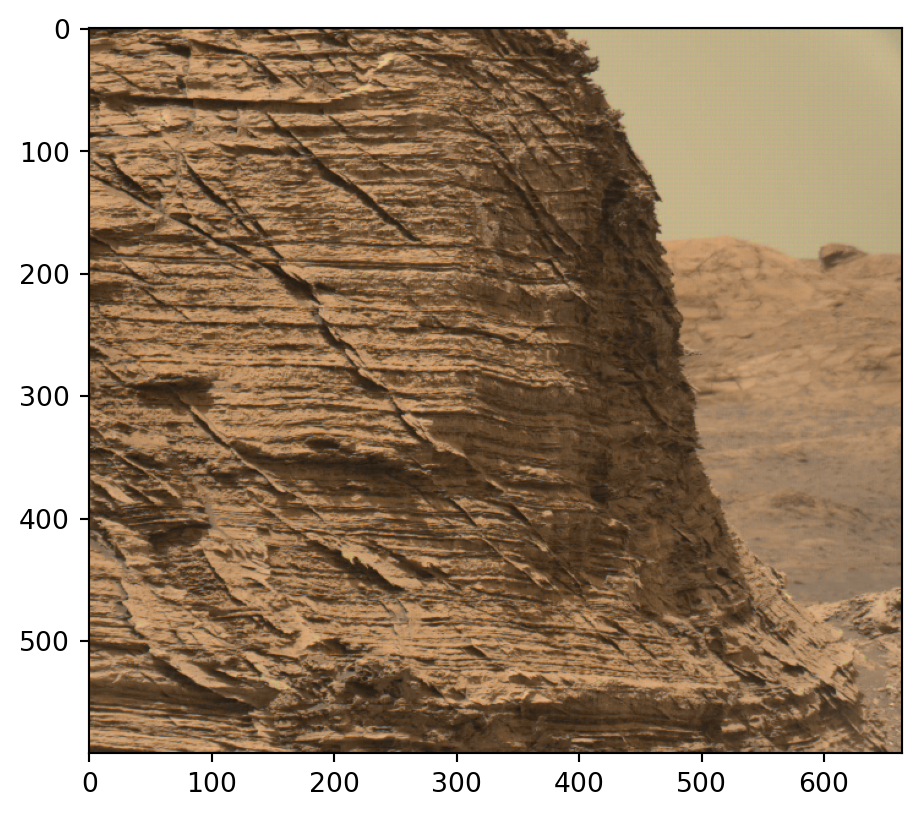

In [10]:
# Display the image
img_color = ic.convert_ndarray_to_image(nda_color)

plt.imshow(img_color)
plt.show()

### Batch Processing (debayering) of NRE and NLE images

In [14]:
input_folder = 'cache/curiosity'
output_folder = 'processed/curiosity/3042MR'

In [15]:
files_pattern = '3042MR*.png'

In [16]:
total_files = 0
total_processed = 0

for file in glob.glob(os.path.join(input_folder, files_pattern)):
    
    folder, file_name, file_ext = ioc.extract_elements_from_path(
        path=file)
    
    processed_file_path = os.path.join(
        output_folder,
        '{0}{1}'.format(file_name, file_ext))
    
    path = os.path.abspath(file)
    dest = os.path.abspath(processed_file_path)
    
    if not os.path.exists(dest):
        ic.debayer_image(
            path=os.path.abspath(file),
            dest=os.path.abspath(processed_file_path),
            crop=1,
            mode='rggb')
        
        total_processed += 1
        
    total_files += 1

print('Found {0}, Processed {1}'.format(
    total_files,
    total_processed))

Found 100, Processed 100
